In [51]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport  # Importa ProfileReport desde ydata-profiling
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import RocCurveDisplay  # Nueva importación para ROC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings("ignore")

# Configuración para mostrar gráficos dentro del notebook
%matplotlib inline


In [52]:
dataM = pd.read_csv("https://raw.githubusercontent.com/salsaimon/proyecto_salud/main/dataM.csv", sep=",",encoding = 'utf-8')
dataM

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,1,40,1,0,0,0,0,0,5,18,15,1,9,4,3
1,0,0,0,25,1,0,0,1,0,1,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,0,1,5,30,30,1,9,4,8
3,0,1,0,27,0,0,0,1,0,0,2,0,0,0,11,3,6
4,0,1,1,24,0,0,0,1,0,0,2,3,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,0,1,1,45,0,0,0,0,0,0,3,0,5,0,5,6,7
229470,1,1,1,18,0,0,0,0,0,0,4,0,0,1,11,2,4
229471,0,0,0,28,0,0,0,1,0,0,1,0,0,0,2,5,2
229472,0,1,0,23,0,0,0,0,0,0,3,0,0,0,7,5,1


In [53]:
X=dataM.drop("Diabetes_binary",axis=1)
Y=dataM["Diabetes_binary"]

In [54]:
#Submuestreo
Y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [55]:
nm = NearMiss(version = 1 , n_neighbors = 10)
x_sm,y_sm= nm.fit_resample(X,Y)

In [56]:
y_sm.shape , x_sm.shape

((70194,), (70194, 16))

In [57]:
y_sm.value_counts()

Diabetes_binary
0    35097
1    35097
Name: count, dtype: int64

In [58]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

Escalado

In [59]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

MODELOS

Regresion Logistica

In [60]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [61]:
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8511
Test set score: 0.8472


In [62]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error: 0.15276128970986277
Root Mean Squared Error : 0.39084688780884874


In [63]:
matrix = classification_report(Y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10468
           1       0.92      0.76      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059



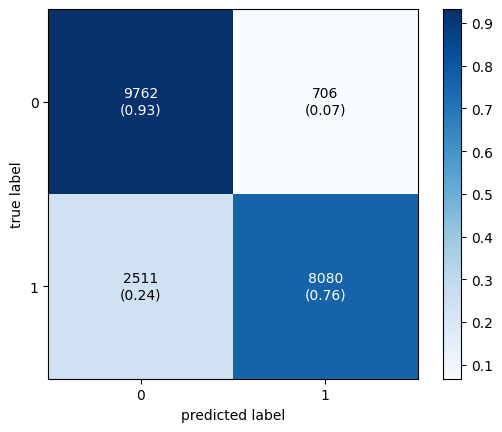

In [64]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Arboles de Decision

In [65]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [66]:
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8657
Test set score: 0.8475


In [67]:
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1525238615318866
Root Mean Squared Error : 0.3905430341612645


In [68]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     10468
           1       0.95      0.74      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.87      0.85      0.85     21059
weighted avg       0.87      0.85      0.85     21059



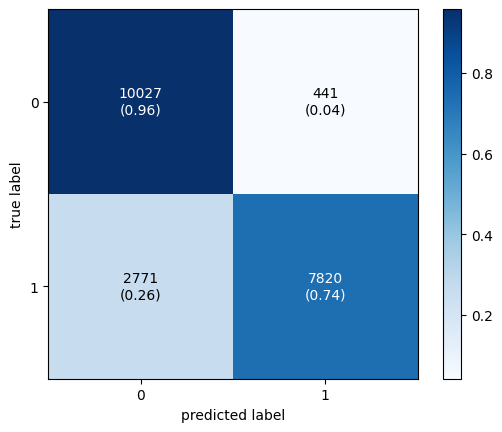

In [69]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

KNN

In [70]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [71]:
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8422
Test set score: 0.8049


In [72]:
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.19507099102521488
Root Mean Squared Error : 0.44166841750935154


In [73]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     10468
           1       0.93      0.66      0.77     10591

    accuracy                           0.80     21059
   macro avg       0.83      0.81      0.80     21059
weighted avg       0.83      0.80      0.80     21059



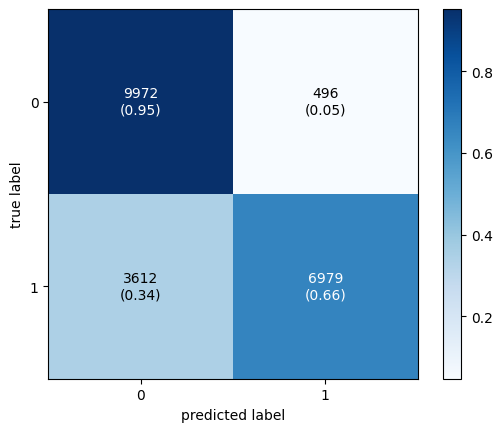

In [74]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Random Forest

In [75]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [76]:
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8713
Test set score: 0.8588


In [77]:
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14117479462462604
Root Mean Squared Error : 0.375732344395084


In [78]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10468
           1       0.94      0.77      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059



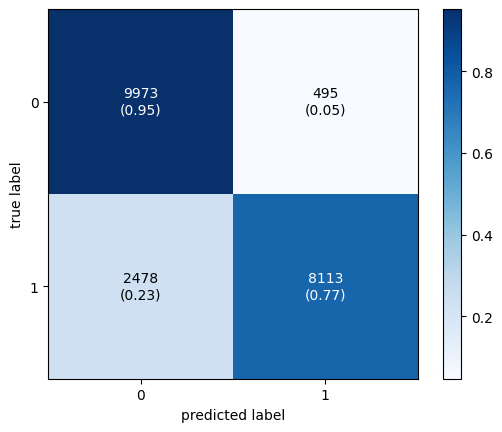

In [79]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Epoch 1/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8216 - loss: 0.3944 - val_accuracy: 0.8639 - val_loss: 0.3165
Epoch 2/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8668 - loss: 0.3140 - val_accuracy: 0.8644 - val_loss: 0.3118
Epoch 3/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8683 - loss: 0.3069 - val_accuracy: 0.8615 - val_loss: 0.3185
Epoch 4/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8743 - loss: 0.2986 - val_accuracy: 0.8671 - val_loss: 0.3064
Epoch 5/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8734 - loss: 0.2966 - val_accuracy: 0.8665 - val_loss: 0.3069
Epoch 6/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8727 - loss: 0.2961 - val_accuracy: 0.8673 - val_loss: 0.3048
Epoch 7/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8766 - loss: 0.2897 - val_accuracy: 0.8671 - val_loss: 0.3021
Epoch 8/50
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8738 - loss: 0.2914 - 

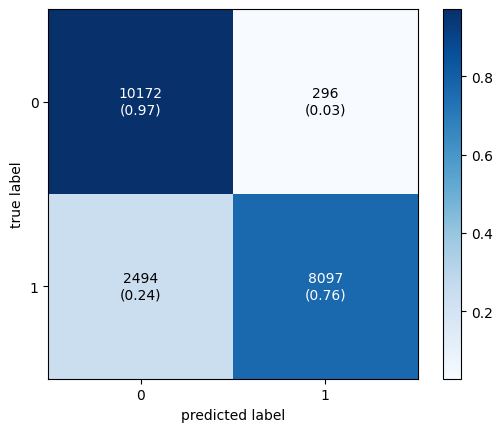

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Salida binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predecir y generar reporte de clasificación
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Imprimir el reporte de clasificación
print(classification_report(Y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
plt.show()


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Configuración de la búsqueda de hiperparámetros para Random Forest
param_dist = {
    'n_estimators': randint(100, 300),            # Rango de número de árboles
    'max_depth': randint(5, 20),                  # Rango de profundidad de los árboles
    'min_samples_split': randint(2, 10),          # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 10),           # Número mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt'],             # Selección de características
    'class_weight': ['balanced']                  # Ponderación para abordar el desbalance
}

# Configuración del modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, scoring='f1', 
    cv=5, random_state=42, n_jobs=-1, verbose=1
)

# Entrenar la búsqueda de hiperparámetros
random_search.fit(X_train, Y_train)

# Obtener el mejor modelo
best_rf = random_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test)
print("Mejores hiperparámetros:", random_search.best_params_)
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(Y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(Y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 154}

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10468
           1       0.94      0.78      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059


Matriz de confusión:
[[9901  567]
 [2338 8253]]


In [82]:
import joblib
import pandas as pd

# Guardar el modelo entrenado
joblib.dump(best_rf, "modelo_rf_balanceado.pkl")
print("Modelo guardado como 'modelo_rf_balanceado.pkl'")

# Cargar los datos originales
datos_usuarios = pd.read_csv("dataM.csv")

# Separar las características de entrada
X_nuevos = datos_usuarios.drop("Diabetes_binary", axis=1)

# Hacer predicciones con el mejor modelo
predicciones = best_rf.predict(X_nuevos)

# Agregar las predicciones al DataFrame original
datos_usuarios["Predicción"] = predicciones

# Guardar el DataFrame con las predicciones en un archivo Excel
datos_usuarios.to_excel("datos_usuarios_con_predicciones.xlsx", index=False)
print("Archivo generado: datos_usuarios_con_predicciones.xlsx")


Modelo guardado como 'modelo_rf_balanceado.pkl'
Archivo generado: datos_usuarios_con_predicciones.xlsx
